In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Frederick\anaconda3\envs\test_proyec\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = df[df["job_title_short"] == "Data Analyst"]

In [3]:
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby("job_skills").agg(
    skill_count=("job_skills", "count"),
    median_salary=("salary_year_avg", "median")
)

skills_stats = skill_stats.sort_values(by="skill_count", ascending=False).head(10)

skill_stats

,skill_count,median_salary
job_skills,,
airflow,45254,147090.5
airtable,296,102500.0
alteryx,12297,115000.0
angular,5354,130000.0
angular.js,115,127050.0
...,...,...
wrike,73,101250.0
wsl,96,NaN
xamarin,62,121250.0


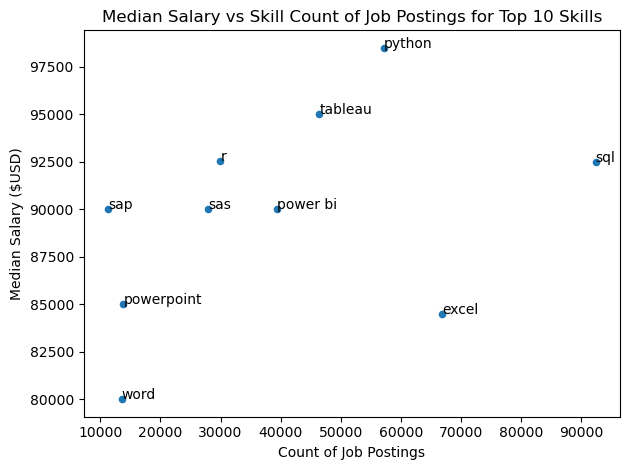

In [14]:
skills_stats.plot(kind="scatter", x="skill_count", y="median_salary")
plt.title("Median Salary vs Skill Count of Job Postings for Top 10 Skills")
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Salary ($USD)")

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats["skill_count"].iloc[i], skills_stats["median_salary"].iloc[i], txt)

plt.tight_layout()
plt.show()